In [1]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [3]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
(365, 288)


In [4]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

number of days with missing value: 28
(337, 288)


PCA and kernel PCA
At begining,I chose visualization to evaluate the dimension reduction of dataset

Text(0.5, 1.0, 'Kernel PCA (Sigmoid)')

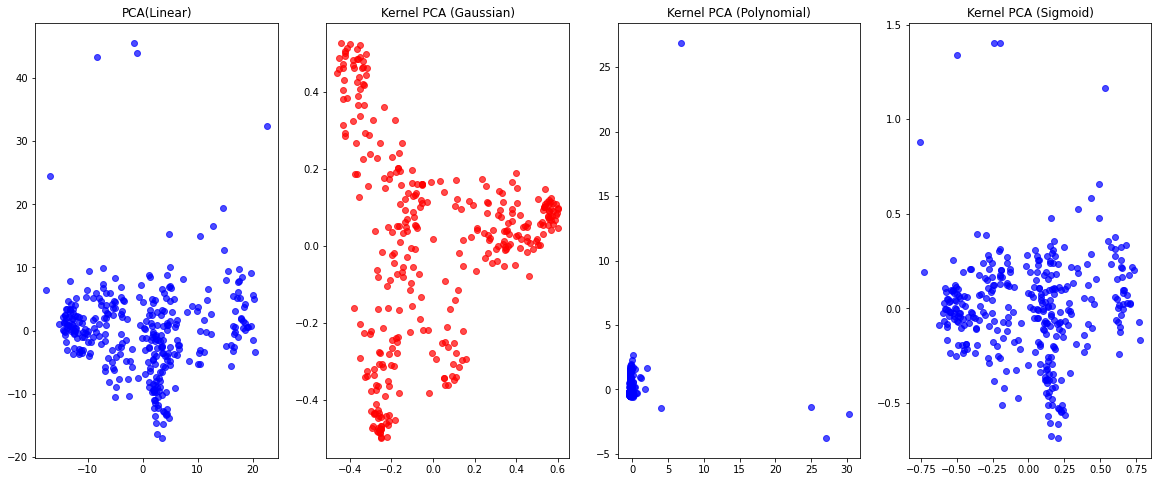

In [22]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as 'data'
# If not, replace this with loading your actual dataset

da = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(da)

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=10)  # Set the desired number of components
pca_result = pca.fit_transform(data)

# Step 2: Perform Kernel PCA with different kernel functions
# kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'


kernel_pca_gaussian = KernelPCA(kernel='rbf', n_components=10)  # Gaussian kernel
kernel_pca_polynomial = KernelPCA(kernel='poly', n_components=10)  # Polynomial kernel
kernel_pca_sigmoid = KernelPCA(kernel='sigmoid',n_components=10)# Sigmoid kernel

kpca_gaussian_result = kernel_pca_gaussian.fit_transform(data)
kpca_polynomial_result = kernel_pca_polynomial.fit_transform(data)
kpca_sigmoid_result = kernel_pca_sigmoid.fit_transform(data)


# Step 3: Pick the best kernel function based on your assessment
# You may evaluate the results using some metric or visual inspection
# For example, you can visualize the results


plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('PCA(Linear)')

plt.subplot(1, 4, 2)
plt.scatter(kpca_gaussian_result[:, 0], kpca_gaussian_result[:, 1], c='r', marker='o', alpha=0.7)
plt.title('Kernel PCA (Gaussian)')

plt.subplot(1, 4, 3)
plt.scatter(kpca_polynomial_result[:, 0], kpca_polynomial_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('Kernel PCA (Polynomial)')

plt.subplot(1, 4, 4)
plt.scatter(kpca_sigmoid_result[:, 0], kpca_sigmoid_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('Kernel PCA (Sigmoid)')

# Note: You might need to fine-tune parameters for the kernel functions (e.g., gamma for the Gaussian kernel) based on your specific dataset.

For PCA,I use different way to evaluate the dimensionality reduction impact.At the beginning, I chose n_components=10 to show its explained variance and stablity analysis

In [48]:
# Investigate Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.48159624 0.14913869 0.08361855 0.04750937 0.02495014 0.02230816
 0.01380855 0.01220711 0.01010457 0.00893724]


In [27]:
# Conduct Stability Analysis
num_runs = 10  # Number of times to run PCA with different random seeds

prop_data_used = 0.8 # Define the proportion of data to use in each iteration (e.g., 80%)

for i in range(num_runs):
    # Randomly select a subset of the data
    prop_data_used
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = da.loc[subset_indices]
    # Fit PCA on the subset
    pca = PCA(n_components=10)  # Change random_state for each run
    X_pca = pca.fit_transform(subset_data)
    
    explained_variance = pca.explained_variance_ratio_
    print(f'Run {i+1} - Explained Variance Ratio: {explained_variance}')

Run 1 - Explained Variance Ratio: [0.48723905 0.14827758 0.07864861 0.04906704 0.02530801 0.02359557
 0.01391823 0.01222105 0.00982645 0.00954648]
Run 2 - Explained Variance Ratio: [0.48623407 0.15558551 0.07891742 0.04643282 0.02594523 0.02245287
 0.01402891 0.01253352 0.00946437 0.00899406]
Run 3 - Explained Variance Ratio: [0.48674672 0.14642544 0.0814639  0.04725499 0.02480074 0.02417756
 0.01402051 0.01275637 0.01042973 0.00916665]
Run 4 - Explained Variance Ratio: [0.47959799 0.14291893 0.0848646  0.04679138 0.02529942 0.02184451
 0.01474491 0.0131398  0.01054216 0.00937223]
Run 5 - Explained Variance Ratio: [0.46416254 0.15937901 0.08394721 0.05232402 0.02532677 0.02273264
 0.0141827  0.01265882 0.01063154 0.0095051 ]
Run 6 - Explained Variance Ratio: [0.47173991 0.15978079 0.08988786 0.04353726 0.0256773  0.02218284
 0.01306379 0.01177325 0.00939966 0.0093321 ]
Run 7 - Explained Variance Ratio: [0.5081218  0.13589572 0.0778211  0.04787557 0.025168   0.02137627
 0.01490666 0.011

In [51]:
pca_1 = PCA(n_components=2)  # Set the desired number(2) of components
pca_1_result = pca_1.fit_transform(data)

In [52]:
# Investigate Explained Variance
explained_variance = pca_1.explained_variance_ratio_
print(f'Explained Variance Ratio(n_components=2): {explained_variance}')

Explained Variance Ratio(n_components=2): [0.48159624 0.14913869]


In [53]:
# Conduct Stability Analysis
num_runs = 10  # Number of times to run PCA with different random seeds

prop_data_used = 0.8 # Define the proportion of data to use in each iteration (e.g., 80%)

for i in range(num_runs):
    # Randomly select a subset of the data
    prop_data_used
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = da.loc[subset_indices]
    # Fit PCA on the subset
    pca_1= PCA(n_components=10)  # Change random_state for each run
    X_pca_1 = pca_1.fit_transform(subset_data)
    
    explained_variance = pca_1.explained_variance_ratio_
    print(f'Run {i+1} - Explained Variance Ratio: {explained_variance}')

Run 1 - Explained Variance Ratio: [0.48443483 0.14495866 0.07917079 0.04624116 0.02603755 0.02481385
 0.01447459 0.01354649 0.01091844 0.00932738]
Run 2 - Explained Variance Ratio: [0.47100268 0.162696   0.08687846 0.04465787 0.0268793  0.02111798
 0.01378196 0.01066788 0.00985607 0.00905371]
Run 3 - Explained Variance Ratio: [0.46771482 0.16174293 0.08846394 0.04560687 0.02442346 0.02071008
 0.01434118 0.01332942 0.01031392 0.00933737]
Run 4 - Explained Variance Ratio: [0.49534988 0.1427166  0.07625796 0.04792659 0.02668783 0.02293049
 0.01391823 0.01243719 0.0100551  0.00927839]
Run 5 - Explained Variance Ratio: [0.46610089 0.1576864  0.08580875 0.05088965 0.02702407 0.02153178
 0.01460374 0.01275986 0.01007676 0.00910324]
Run 6 - Explained Variance Ratio: [0.46756461 0.14935092 0.09019808 0.04736742 0.02724122 0.02072556
 0.0142401  0.01285044 0.01028874 0.00942193]
Run 7 - Explained Variance Ratio: [0.4857753  0.1495496  0.07949383 0.04606444 0.02649984 0.0215516
 0.01345961 0.0133

Then, I use visualization way to evaluate the kernel PCA and PCA,and count the outlier for different kernel PCA.Having chosen the same stablity analysis condition, 

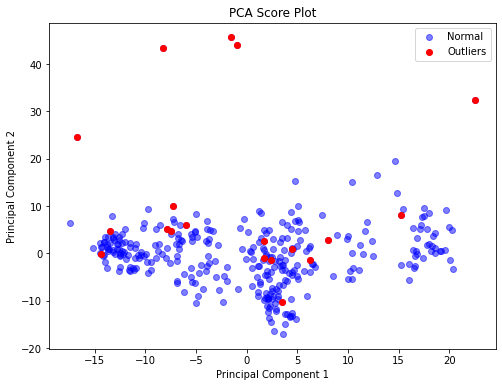

Number of detected outliers: 19
Detected outliers: [  0  40 113 175 176 202 213 218 230 231 248 253 258 279 280 288 299 315
 329]


In [56]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Apply PCA for reconstruction
pca = PCA(n_components=2)
X_reconstructed = pca.inverse_transform(pca.fit_transform(X_normalized))

# Calculate reconstruction errors
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Set a threshold for the reconstruction error
threshold = 1  # Adjust as needed

# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

# Visual Inspection of PCA Score Plots
pca_scores = pca.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(pca_scores[outliers, 0], pca_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Score Plot')
plt.show()

# Print the indices of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')

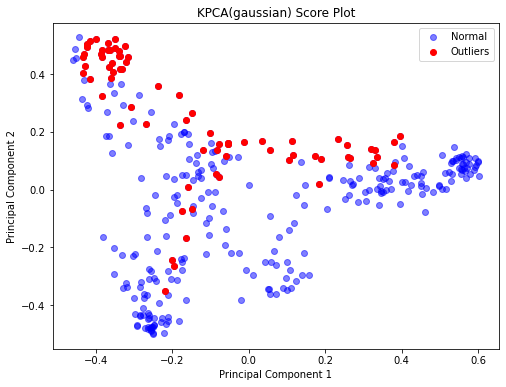

Number of detected outliers: 76
Detected outliers: [  0   1   2   5   8   9  15  16  23  26  29  35  36  40  43  48  49  54
  55  60  61  62  68  69  76  82  83  84  86  87  88  93  94 101 107 108
 111 112 113 114 125 130 134 143 150 156 166 167 172 175 176 202 213 218
 230 231 237 248 249 253 255 258 266 269 273 279 280 283 284 288 299 304
 315 329 330 336]


In [41]:
from sklearn.decomposition import KernelPCA

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Step 1: Visual Inspection of Kernel PCA Score Plots
# Perform Kernel PCA
# Kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'.
kernel_pca_gaussian = KernelPCA(kernel='rbf', n_components=10,fit_inverse_transform=True)  # Gaussian kernel
X_kpca_gaussian =kernel_pca_gaussian.fit_transform(X_normalized)


# Step 2: Detecting Outliers through Computing Reconstruction Errors
# Reconstruct the data from the reduced kernel PCA space
X_reconstructed =kernel_pca_gaussian.inverse_transform(X_kpca_gaussian)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Define a threshold for outliers
threshold = 1  # Adjust as needed
kpca_gaussian_scores = kernel_pca_gaussian.fit_transform(X_normalized)
# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

plt.figure(figsize=(8, 6))
plt.scatter(kpca_gaussian_scores[:, 0], kpca_gaussian_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(kpca_gaussian_scores[outliers, 0], kpca_gaussian_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('KPCA(gaussian) Score Plot')
plt.show()
# Print the number of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')

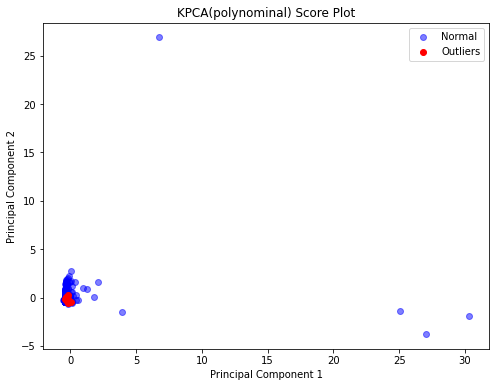

Number of detected outliers: 9
Detected outliers: [ 40 213 218 230 248 279 288 299 315]


In [44]:
from sklearn.decomposition import KernelPCA

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Step 1: Visual Inspection of Kernel PCA Score Plots
# Perform Kernel PCA
# Kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'.
kernel_pca_polynomial = KernelPCA(kernel='poly', n_components=10,fit_inverse_transform=True)  # Gaussian kernel
X_kpca_polynomial =kernel_pca_polynomial.fit_transform(X_normalized)



# Step 2: Detecting Outliers through Computing Reconstruction Errors
# Reconstruct the data from the reduced kernel PCA space
X_reconstructed =kernel_pca_polynomial.inverse_transform(X_kpca_polynomial)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Define a threshold for outliers
threshold = 1  # Adjust as needed
kpca_polynomial_scores = kernel_pca_polynomial.fit_transform(X_normalized)
# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

plt.figure(figsize=(8, 6))
plt.scatter(kpca_polynomial_scores[:, 0], kpca_polynomial_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(kpca_polynomial_scores[outliers, 0], kpca_polynomial_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('KPCA(polynominal) Score Plot')
plt.show()
# Print the number of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')

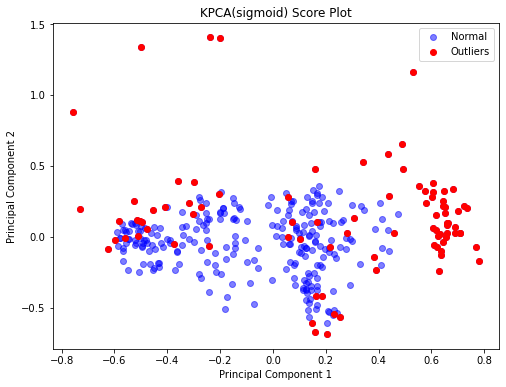

Number of detected outliers: 87
Detected outliers: [  0   1   2   5   8   9  15  16  22  23  26  28  29  35  36  40  42  43
  48  49  54  55  60  61  62  68  69  75  76  82  83  84  86  87  88  93
  94  98 100 101 106 107 108 111 112 113 114 125 130 134 143 150 151 156
 166 167 171 172 175 176 202 213 218 230 231 237 248 249 253 255 258 266
 269 273 279 280 283 284 288 290 299 304 315 329 330 331 336]


In [45]:
from sklearn.decomposition import KernelPCA

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Step 1: Visual Inspection of Kernel PCA Score Plots
# Perform Kernel PCA
# Kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'.
kernel_pca_sigmoid = KernelPCA(kernel='sigmoid', n_components=10,fit_inverse_transform=True)  # Gaussian kernel
X_kpca_sigmoid =kernel_pca_sigmoid.fit_transform(X_normalized)




# Step 2: Detecting Outliers through Computing Reconstruction Errors
# Reconstruct the data from the reduced kernel PCA space
X_reconstructed =kernel_pca_sigmoid.inverse_transform(X_kpca_sigmoid)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Define a threshold for outliers
threshold = 1  # Adjust as needed
kpca_sigmoid_scores = kernel_pca_sigmoid.fit_transform(X_normalized)
# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

plt.figure(figsize=(8, 6))
plt.scatter(kpca_sigmoid_scores[:, 0], kpca_sigmoid_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(kpca_sigmoid_scores[outliers, 0], kpca_sigmoid_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('KPCA(sigmoid) Score Plot')
plt.show()
# Print the number of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')